**Créé par Gael AHOUANVOEDO**

**🚀 Flotte aérienne américaine 📊 US 📈**

**22 Mai 2022**

# **<center><span style="color:#fd7b12;">🚀 FLOTTE AERIENNE AMERICAINE 🚀   </span></center>**
## <center>Pour plus d'informations contctez moi sur LinkedIn 👍</center>

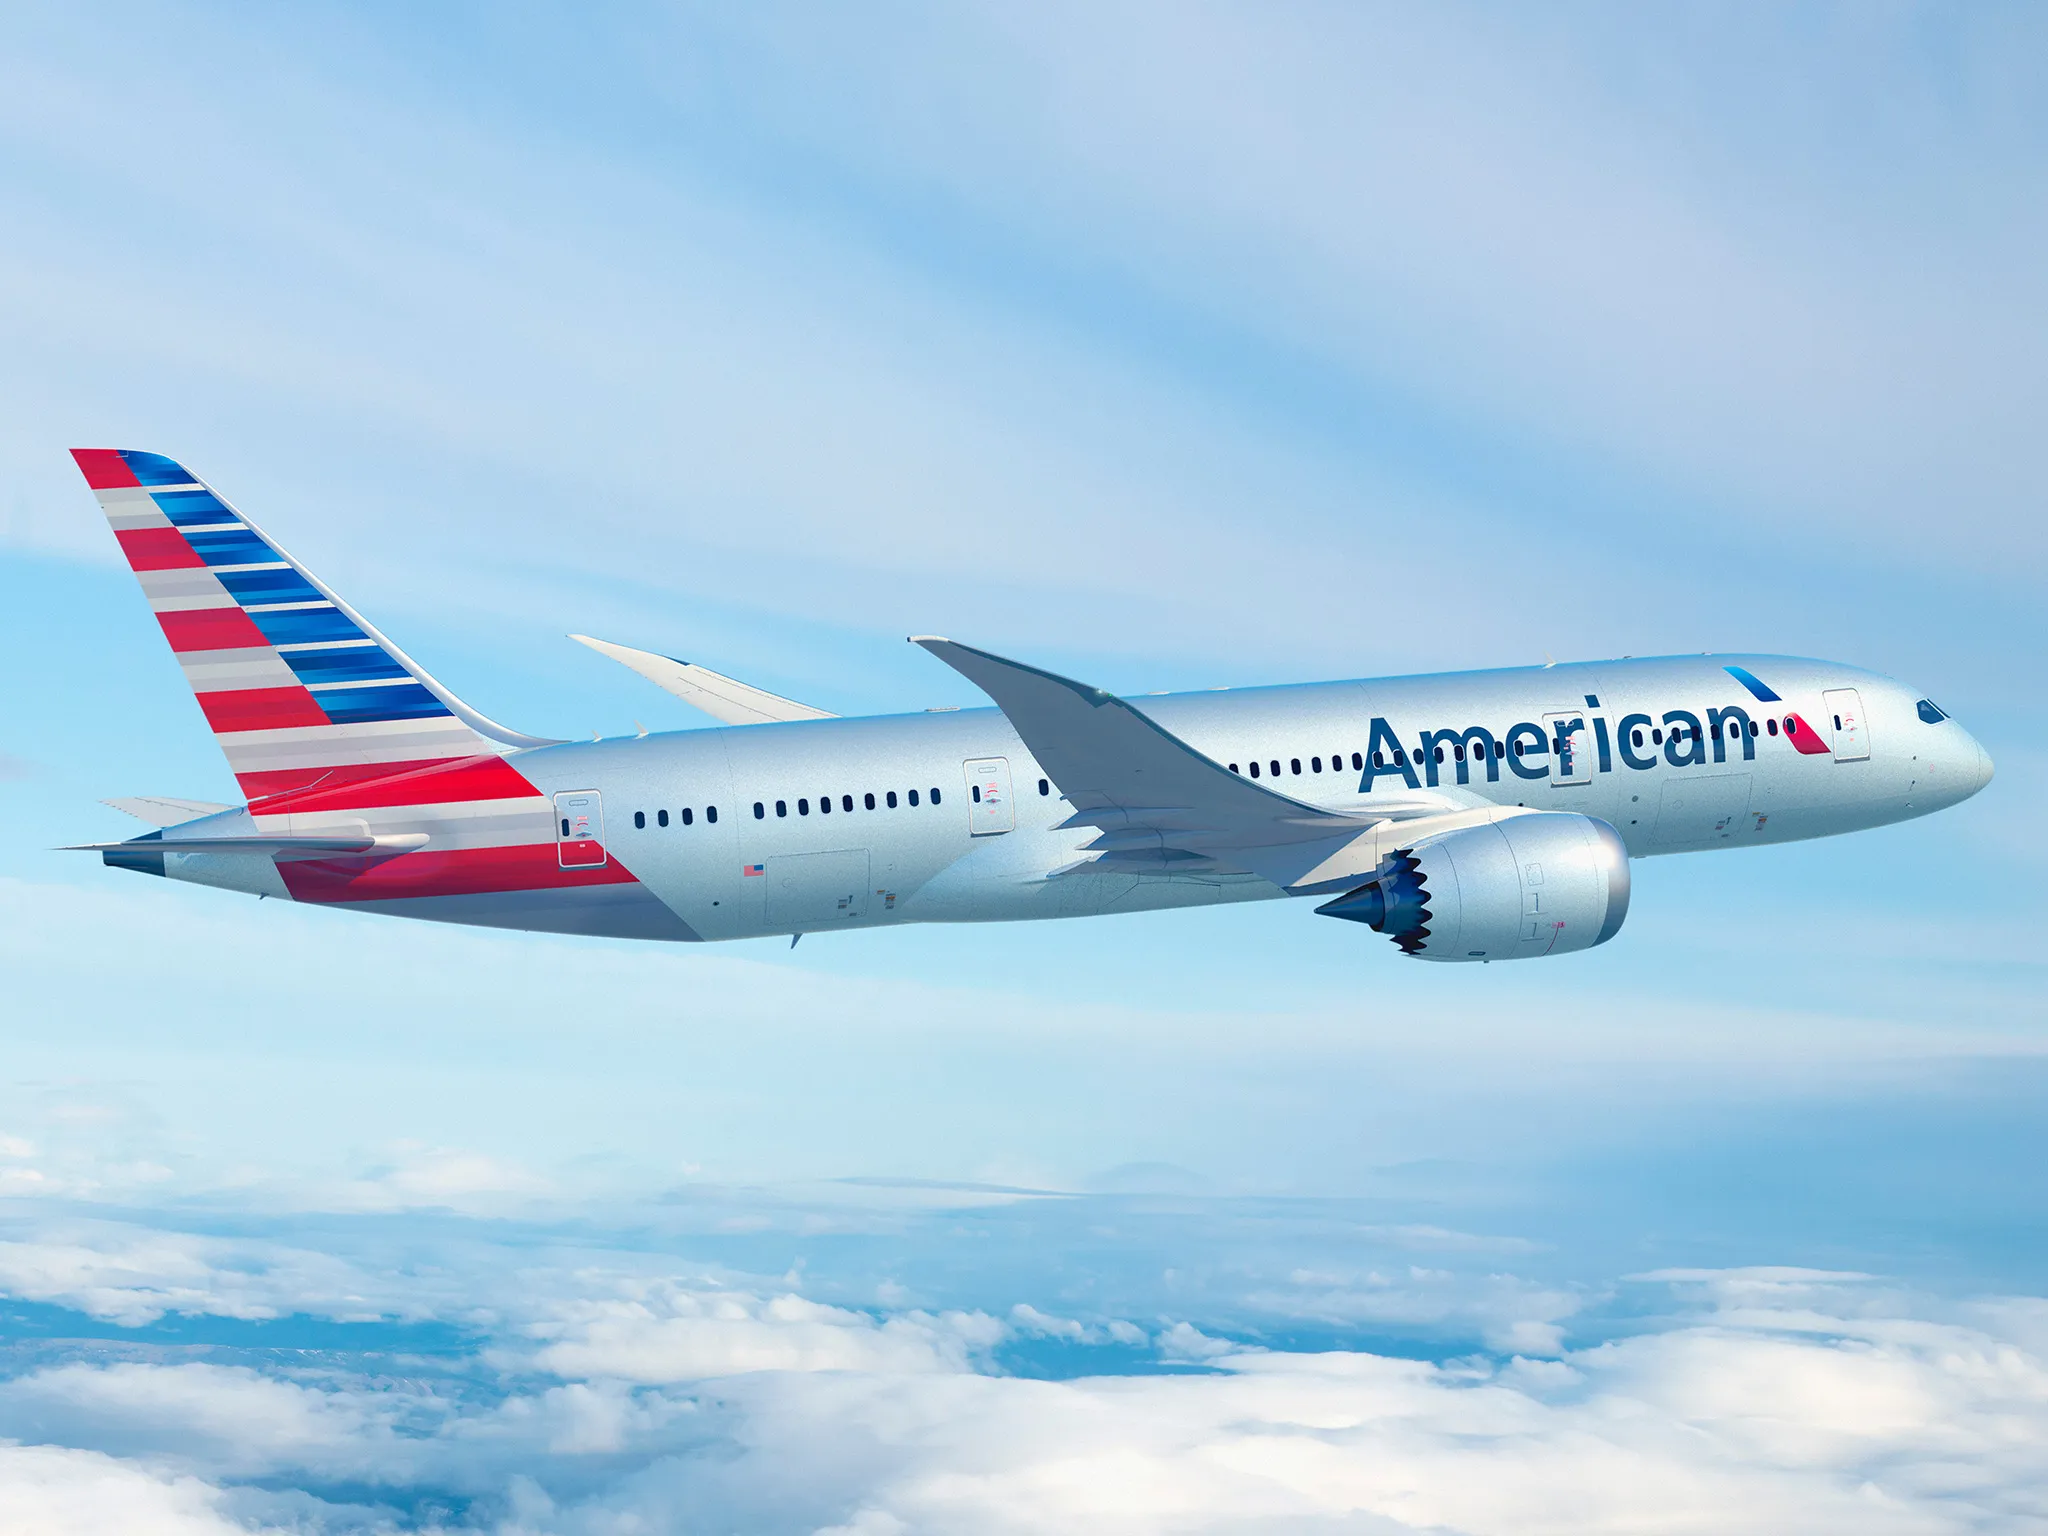

# **<span style="color:#fd7b12;">Table of Contents  </span>**
<a id="toc"></a>
- [1. Introduction](#1)
- [2. Imports](#2)
- [3. Data Wrangling](#3)
- [4. Exploratory Data Analyse](#4)
- [5. Prediction](#5)
- [6. Conclusion](#6)

<a id="1"></a>
# **<center><span style="color:#fd7b12;">Introduction  </span></center>**

### Dans ce projet, il est question d'analyser la flotte aérienne américaine

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="2"></a>
# **<center><span style="color:#fd7b12;">Imports  </span></center>**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="3"></a>
# **<center><span style="color:#fd7b12;"> Data Wrangling </span></center>**

### Importons d'abord notre dataframe

In [2]:
data= pd.read_csv('2007.csv')
df = data.copy()

In [3]:
df.sample(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
6818301,2007,11,1,4,2050.0,2055,2358.0,38,DL,409,...,17,28,0,NaN,0,0,0,0,0,0
2068987,2007,4,26,4,807.0,800,1022.0,1016,UA,635,...,6,25,0,NaN,0,0,0,0,0,0
4262691,2007,7,29,7,1234.0,1235,1333.0,1340,AA,2427,...,6,18,0,NaN,0,0,0,0,0,0
2717371,2007,5,15,2,1800.0,1810,1846.0,1827,US,247,...,9,42,0,NaN,0,0,0,19,0,0
3365488,2007,6,7,4,800.0,640,957.0,829,US,1643,...,4,32,0,NaN,0,80,0,8,0,0


### Vérifions si effectivement nous n'avons que des données de 2007

In [4]:
df.Year.unique()

array([2007], dtype=int64)

### Ok maintenant faisons le point sur les différentes colonnes

In [5]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453215 entries, 0 to 7453214
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay      

### Renomons les variables de jours et de mois pour une meilleure lecture des graphes

In [7]:
df.DayOfWeek.replace({1:'Mon', 2: 'Tue', 3: 'Wed', 4:'Thu',
                5:'Fri', 6:'Sat', 7:'Sun',}, inplace=True)

df.Month.replace({1:'Jan', 2: 'Feb', 3: 'Mar', 4:'Apr',
                5:'May', 6:'Jun', 7:'Jul', 8:'Aug',
                 9:'Sep',10:'Oct',11:'Nov',12:'Dec'}, inplace=True)
df.sample(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
6987441,2007,Dec,25,Tue,1742.0,1745,1806.0,1815,YV,2743,...,2,12,0,NaN,0,0,0,0,0,0
3094452,2007,Jun,8,Fri,NaN,2010,NaN,2245,WN,1715,...,0,0,1,B,0,0,0,0,0,0
890994,2007,Feb,20,Tue,752.0,750,931.0,927,US,1073,...,3,25,0,NaN,0,0,0,0,0,0
476151,2007,Jan,15,Mon,1640.0,1430,1906.0,1655,9E,5948,...,10,23,0,NaN,0,130,0,1,0,0
4641174,2007,Aug,18,Sat,1022.0,1021,1156.0,1158,US,27,...,7,28,0,NaN,0,0,0,0,0,0


### Vérifions si nous avons des valeurs nulles

In [8]:
(df.isnull().sum()*100/len(df)).sort_values(ascending=False)

CancellationCode     97.843226
ArrTime               2.387252
AirTime               2.387252
ActualElapsedTime     2.387252
ArrDelay              2.387252
DepTime               2.156761
DepDelay              2.156761
CRSElapsedTime        0.013337
TailNum               0.000295
WeatherDelay          0.000000
CarrierDelay          0.000000
Diverted              0.000000
Distance              0.000000
NASDelay              0.000000
SecurityDelay         0.000000
Cancelled             0.000000
TaxiOut               0.000000
TaxiIn                0.000000
Year                  0.000000
Dest                  0.000000
Origin                0.000000
Month                 0.000000
FlightNum             0.000000
UniqueCarrier         0.000000
CRSArrTime            0.000000
CRSDepTime            0.000000
DayOfWeek             0.000000
DayofMonth            0.000000
LateAircraftDelay     0.000000
dtype: float64

### Certaines variables présentent des valeurs nulles mais en petit nombre, sauf CancellationCode qui a jusqu'à 97% de valeurs nulles.

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# **<center><span style="color:#fd7b12;"> Exploratory Data Analysis </span></center>**

### Définissons des valeurs de style pour toutes nos visualisations

In [9]:
sns.set_context("talk")
sns.set_style("whitegrid")
colors = sns.color_palette('tab10')

## Month

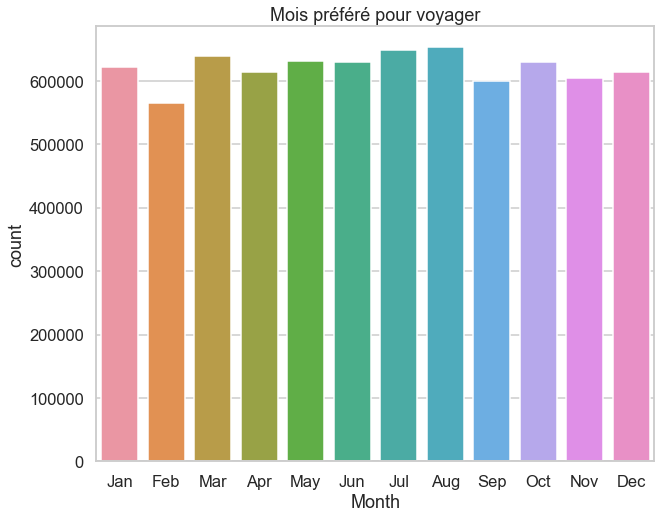

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(df.Month)
plt.title('Mois préféré pour voyager')
plt.show()

> ### On constate que les gens ont tendance à voyager entre juillet et août, ce qui est normal car c'est la période des vacances.

### DayofMonth

In [11]:
df_day = df.copy()

In [12]:
print('Nombre de voyages en 1ère semaine : ' , df_day.query('DayofMonth < 9 ').shape[0]);
print('Nombre de voyages en 2ème semaine : ' , df_day.query('DayofMonth >= 9 & DayofMonth < 17 ').shape[0])
print('Nombre de voyages en 3ème semaine : ' , df_day.query('DayofMonth >= 17 & DayofMonth < 26 ').shape[0])
print('Nombre de voyages en 4ème semaine : ' , df_day.query('DayofMonth >= 26 ').shape[0])

Nombre de voyages en 1ère semaine :  1951552
Nombre de voyages en 2ème semaine :  1971506
Nombre de voyages en 3ème semaine :  2201918
Nombre de voyages en 4ème semaine :  1328239


> ### On constate qu'il y a beaucoup moins de voyage en dernière semaine de mois, du 26 au 31.

## DayofWeek

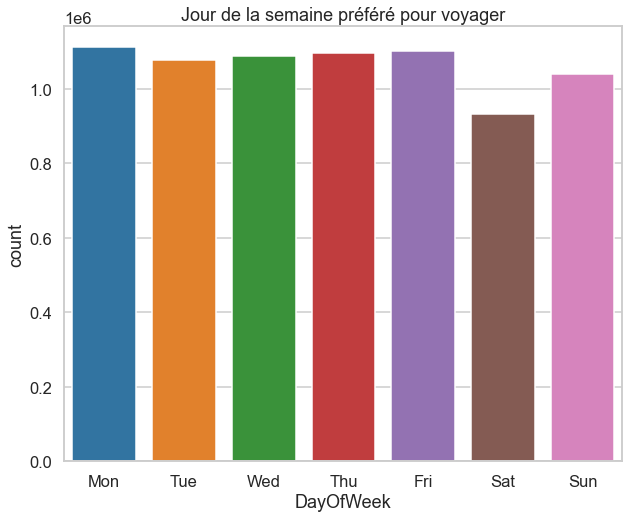

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(df.DayOfWeek)
plt.title('Jour de la semaine préféré pour voyager')
plt.show()

> ### Ettonement, on aurait pensé que il y avait plus de voyage les weekends mais ce n'est pas le cas

## DepTime

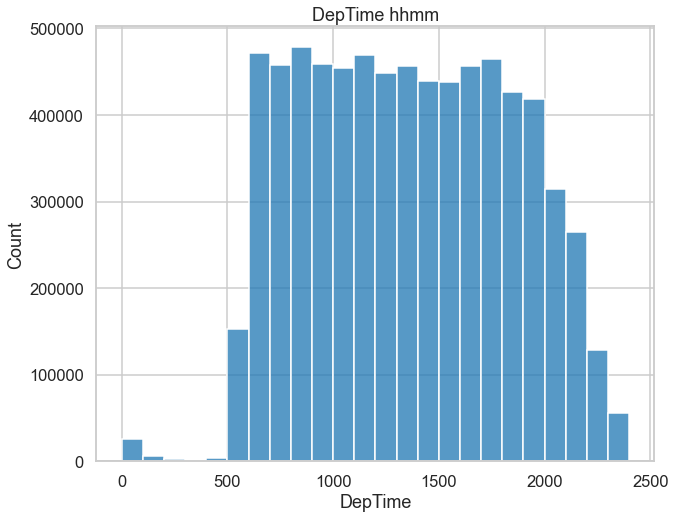

In [14]:
plt.figure(figsize=(10,8))
sns.histplot(df.DepTime, bins = 24)
plt.title('DepTime hhmm')
plt.xlabel('DepTime')
plt.show()

> ### Les départs effectifs de l'aéroport se font généralement entre 6h et 20h.

## CRSDepTime

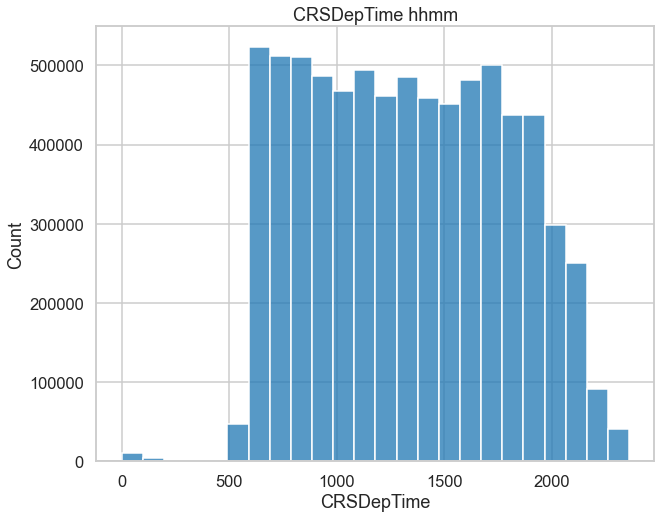

In [15]:
plt.figure(figsize=(10,8))
sns.histplot(df.CRSDepTime, bins = 24)
plt.title('CRSDepTime hhmm')
plt.xlabel('CRSDepTime')
plt.show()

> ### Les vols sont majoritairement programmés entre 6h et 19h.

## UniqueCarrier

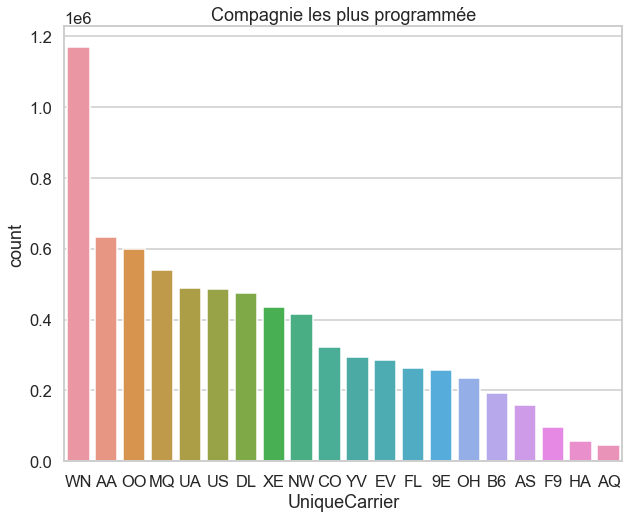

In [16]:
plt.figure(figsize=(10,8))
sns.countplot(x = df.UniqueCarrier,order=df.UniqueCarrier.value_counts().index)
plt.title('Compagnie les plus programmée')
plt.show()

> ### WN, AA, OO, MQ, UA sont les compagnies aériennes qui ont effectué le plus de voyages

### ActualElapsedTime

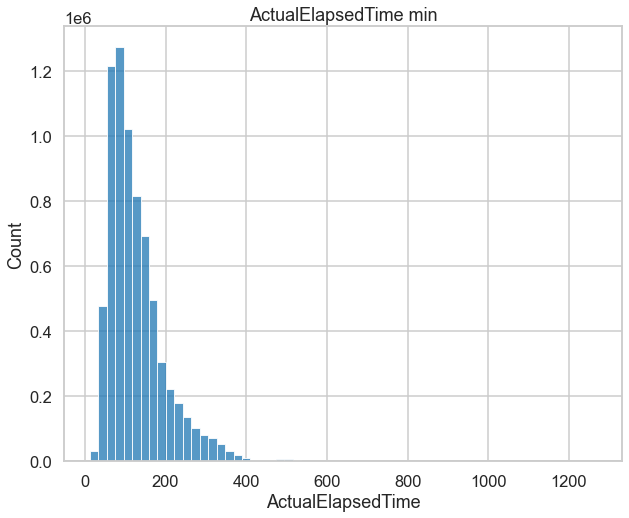

In [17]:
plt.figure(figsize=(10,8))
sns.histplot(x=df.ActualElapsedTime, bins=60)
plt.title('ActualElapsedTime min')
plt.xlabel('ActualElapsedTime')
plt.show()

In [18]:
df_time = df.query('ActualElapsedTime>420')[['Origin','Dest','ActualElapsedTime']].sort_values(by ='ActualElapsedTime',ascending=False)
df_time

,Origin,Dest,ActualElapsedTime
172666,CVG,LAN,1270.0
3867296,CVG,JAN,1260.0
2205995,HNL,SEA,1095.0
6608082,SFO,HNL,1090.0
2828314,LAX,HNL,989.0
...,...,...,...
7112586,BOS,PHX,421.0
1510130,JFK,SEA,421.0
7090808,DEN,KOA,421.0
7090807,DEN,KOA,421.0


In [19]:
df_time.quantile(q=0.95)

ActualElapsedTime    559.0
Name: 0.95, dtype: float64

In [20]:
df_time = df.query('ActualElapsedTime>559')[['Origin','Dest','ActualElapsedTime']].sort_values(by ='ActualElapsedTime',ascending=False)
df_time

,Origin,Dest,ActualElapsedTime
172666,CVG,LAN,1270.0
3867296,CVG,JAN,1260.0
2205995,HNL,SEA,1095.0
6608082,SFO,HNL,1090.0
2828314,LAX,HNL,989.0
...,...,...,...
3697640,ATL,HNL,560.0
6830739,ATL,HNL,560.0
3007810,LGB,JFK,560.0
4028421,CVG,HNL,560.0


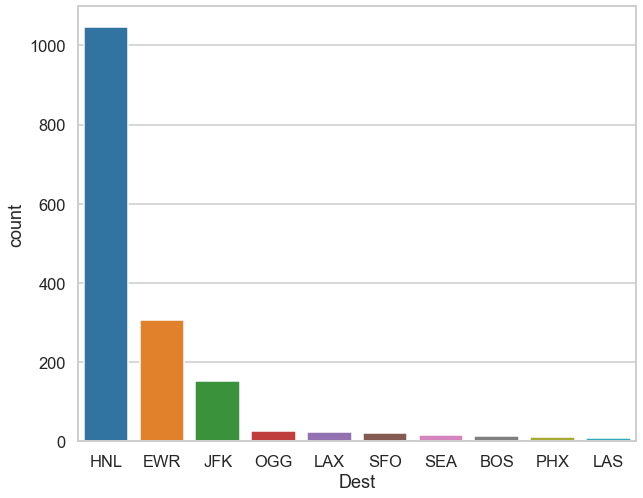

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(x=df_time.Dest, order = df_time.Dest.value_counts().head(10).index)
plt.show()

In [22]:
df_time.query('Dest == "HNL"').sort_values(by ='ActualElapsedTime',ascending=False)

,Origin,Dest,ActualElapsedTime
6608082,SFO,HNL,1090.0
2828314,LAX,HNL,989.0
7434434,EWR,HNL,836.0
1162131,EWR,HNL,725.0
7432009,EWR,HNL,711.0
...,...,...,...
1508158,ATL,HNL,560.0
827348,ORD,HNL,560.0
7322352,ORD,HNL,560.0
224409,ORD,HNL,560.0


> ### Les trajets durent généralement moins de 560 minutes. Il semblerait que l'endroit le plus éloigné à atteindre en général soit l'aéroport HNL. 95% du temps, quand la destination est celle-ci, le voyage est plus long que les autres

## CRSElapsedTime

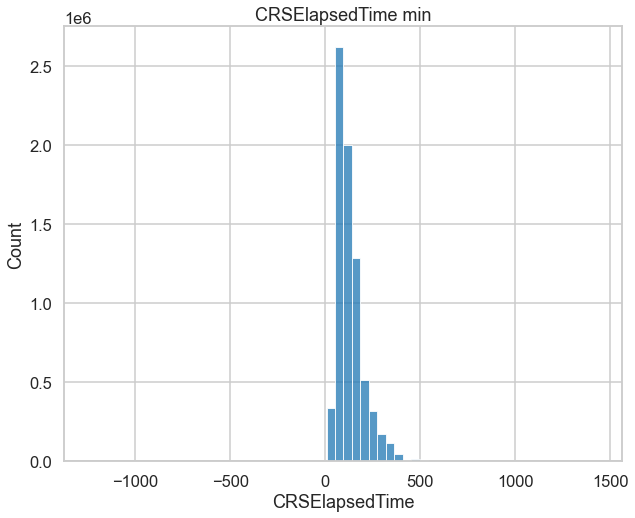

In [23]:
plt.figure(figsize=(10,8))
sns.histplot(x=df.CRSElapsedTime, bins=60)
plt.title('CRSElapsedTime min')
plt.xlabel('CRSElapsedTime')
plt.show()

In [24]:
df_time.groupby(['Dest'])

In [25]:
df.query('CRSElapsedTime<0')['CRSElapsedTime'].sort_values(ascending=False)

1538199     -46.0
566619    -1240.0
Name: CRSElapsedTime, dtype: float64

In [26]:
df.drop(df.query('CRSElapsedTime<0').index , inplace=True)

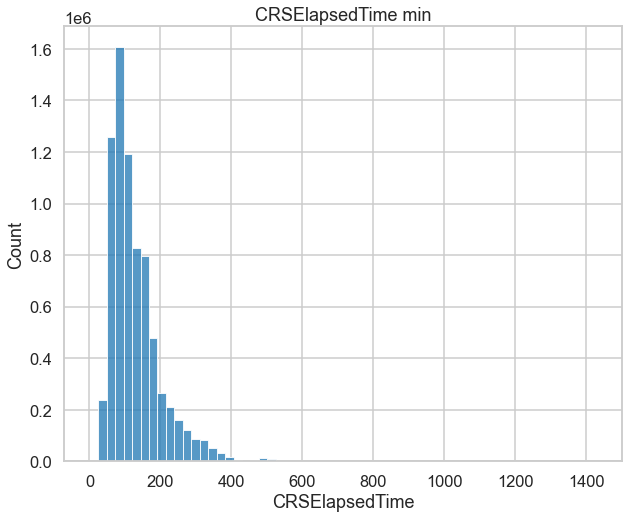

In [27]:
plt.figure(figsize=(10,8))
sns.histplot(x=df.CRSElapsedTime, bins=60)
plt.title('CRSElapsedTime min')
plt.xlabel('CRSElapsedTime')
plt.show()

In [28]:
df.query('CRSElapsedTime>420')['CRSElapsedTime'].sort_values(ascending=False)

6026104    1430.0
7252332    1430.0
1781003     660.0
6809486     660.0
6812831     660.0
            ...  
4683231     421.0
4691074     421.0
4695105     421.0
4687222     421.0
4692380     421.0
Name: CRSElapsedTime, Length: 30669, dtype: float64

> ### Les estimations sur la durée d'un vol dans les airs semblent bonnes. L'histogramme de temps prévu se rapproche étroitement de l'histogramme réel.

## ArrDelay

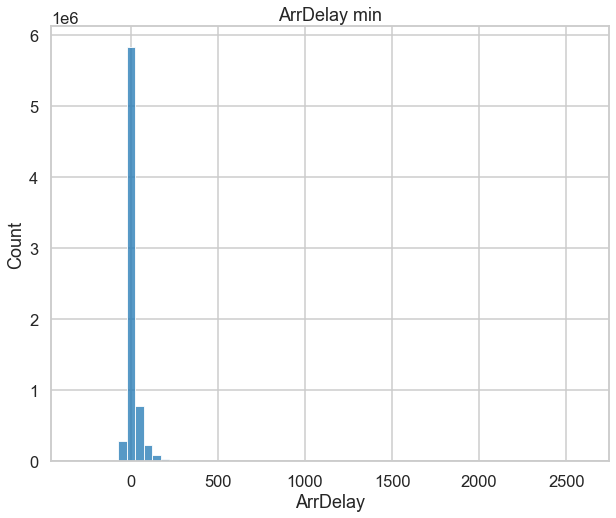

In [29]:
plt.figure(figsize=(10,8))
sns.histplot(x= df.ArrDelay, bins=60)
plt.title('ArrDelay min')
plt.xlabel('ArrDelay')
plt.show()

In [30]:
df.query('ArrDelay >200')['ArrDelay'].sort_values(ascending = False)

6061662    2598.0
7299451    1942.0
6060526    1848.0
6082457    1715.0
5439037    1665.0
            ...  
5420045     201.0
2411418     201.0
3728324     201.0
3728725     201.0
5341542     201.0
Name: ArrDelay, Length: 45949, dtype: float64

## DepDelay

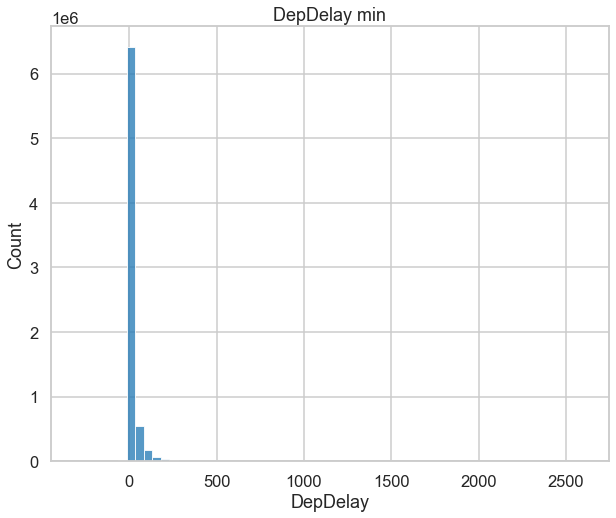

In [31]:
plt.figure(figsize=(10,8))
sns.histplot(x= df.DepDelay, bins=60)
plt.title('DepDelay min')
plt.xlabel('DepDelay')
plt.show()

In [32]:
df.query('DepDelay >200')['DepDelay'].sort_values(ascending = False)

6061662    2601.0
7299451    1956.0
6060526    1831.0
6082457    1736.0
5439037    1689.0
            ...  
7130251     201.0
2565652     201.0
2560757     201.0
7137817     201.0
3673368     201.0
Name: DepDelay, Length: 41556, dtype: float64

In [33]:
len(df.query('DepDelay<0')['DepDelay'])*100/len(df)

47.246925587662666

> ### Les vols retardés atterrissent souvent 200 minutes (3h20min) plus tard. Il est même arrivé qu'un vol ait eu 2500 minutes (41h) de retard. Cependant, notons que 47% des vols n'accusent pas de retard

## Origin

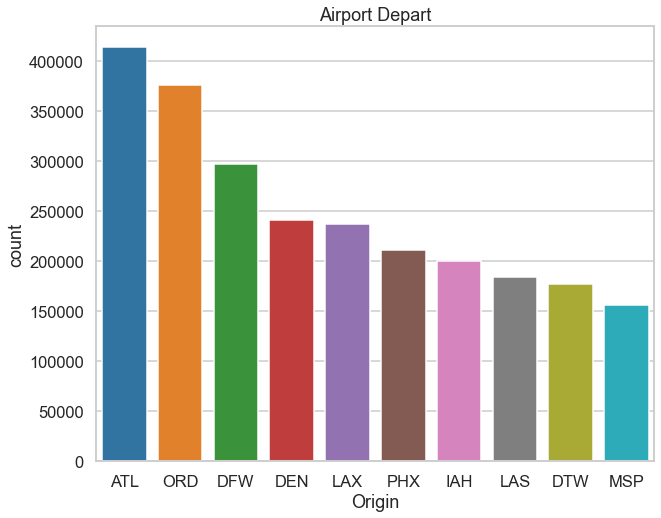

In [34]:
plt.figure(figsize=(10,8))
sns.countplot(x=df.Origin, order=df.Origin.value_counts().head(10).index)
plt.title('Airport Depart')
plt.show()

## Dest

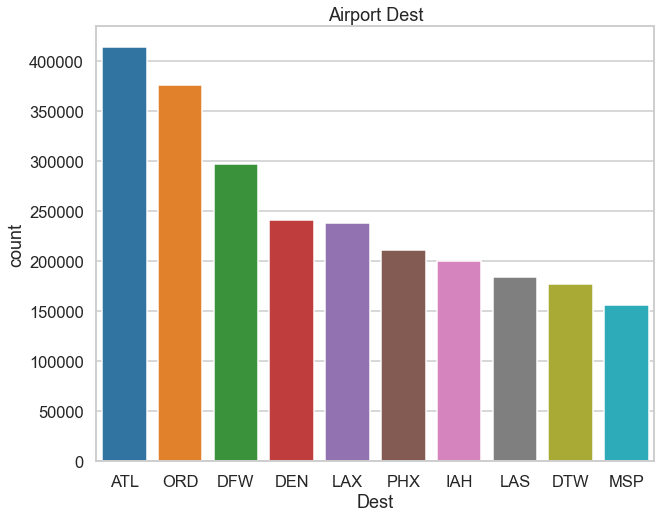

In [35]:
plt.figure(figsize=(10,8))
sns.countplot(x=df.Dest, order=df.Dest.value_counts().head(10).index)
plt.title('Airport Dest')
plt.show()

> ### Les aéroports enregistrant le plus de voyages sont dans l'ordre, ATL, ORD, DFW, DEN, LAX, PHX, IAH, LAS, DTW, MSP

## Distance

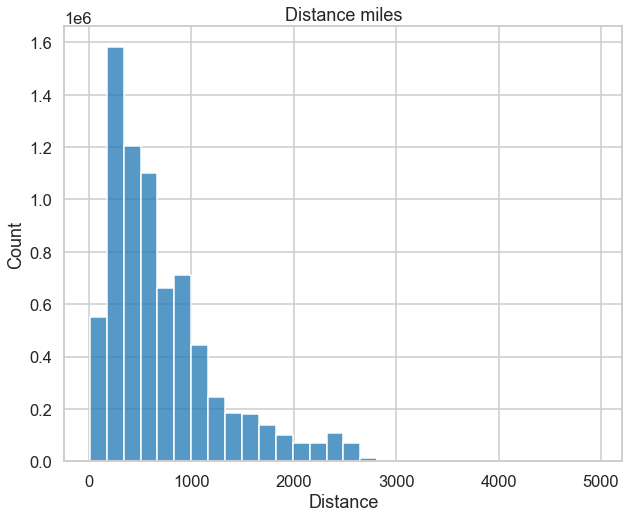

In [36]:
plt.figure(figsize=(10,8))
sns.histplot(x= df.Distance,bins=30)
plt.title('Distance miles')
plt.xlabel('Distance')
plt.show()

In [37]:
df_dist = df.query('Distance>3000')[['Origin','Dest','Distance']].sort_values(by ='Distance',ascending=False)
df_dist

,Origin,Dest,Distance
1166010,HNL,EWR,4962
1154566,EWR,HNL,4962
1152195,EWR,HNL,4962
1152030,EWR,HNL,4962
1151770,EWR,HNL,4962
...,...,...,...
2938724,DFW,ANC,3043
2938725,DFW,ANC,3043
2938726,DFW,ANC,3043
2938727,DFW,ANC,3043


In [38]:
df_dist.quantile(q=0.85)

Distance    4502.0
Name: 0.85, dtype: float64

In [39]:
df_dist = df.query('Distance>4502')[['Origin','Dest','Distance']].sort_values(by ='Distance',ascending=False)
df_dist

,Origin,Dest,Distance
574557,EWR,HNL,4962
4979003,EWR,HNL,4962
4979281,HNL,EWR,4962
4979705,HNL,EWR,4962
4979775,HNL,EWR,4962
...,...,...,...
3025408,HNL,EWR,4962
3026180,EWR,HNL,4962
3026456,EWR,HNL,4962
3026946,EWR,HNL,4962


In [40]:
df_dist.query('Dest == "HNL"').sort_values(by ='Distance',ascending=False)

,Origin,Dest,Distance
574557,EWR,HNL,4962
582703,EWR,HNL,4962
578673,EWR,HNL,4962
578590,EWR,HNL,4962
578026,EWR,HNL,4962
...,...,...,...
7433923,EWR,HNL,4962
7433807,EWR,HNL,4962
7433342,EWR,HNL,4962
7433278,EWR,HNL,4962


> ### Les trajets sont généralement d'un maximum de 3000 milles. Il semblerait que l'endroit le plus éloigné à atteindre en général soit l'aéroport HNL. 85% du temps, lorsque la destination est celle-ci, le trajet est plus long que les autres

## Cancelled

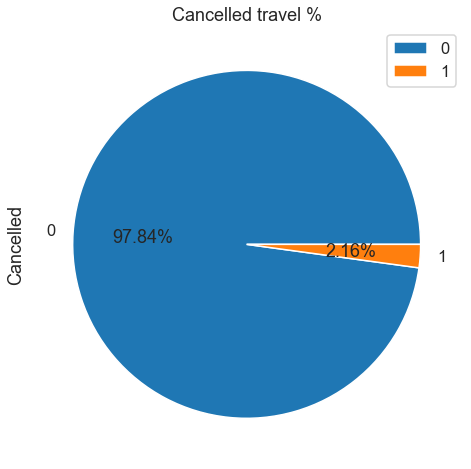

In [41]:
plt.figure(figsize=(10,8))
df.Cancelled.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.legend()
plt.title('Cancelled travel %')
plt.show()

## CancellationCode

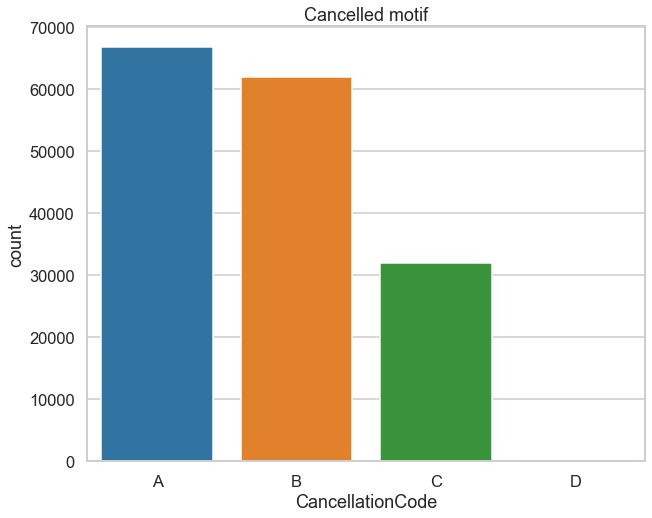

In [42]:
plt.figure(figsize=(10,8))
sns.countplot(x=df.CancellationCode, order= df.CancellationCode.value_counts().index)
plt.title('Cancelled motif')
plt.show()

## Diverted

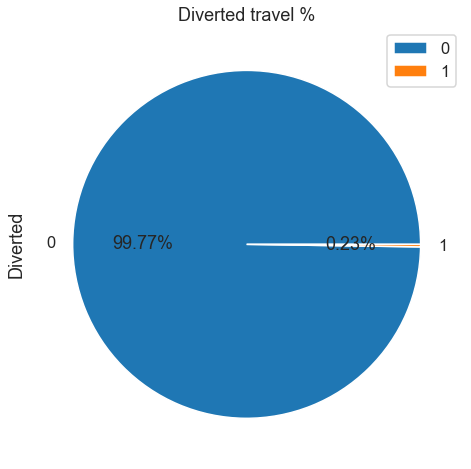

In [43]:
plt.figure(figsize=(10,8))
df.Diverted.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.legend()
plt.title('Diverted travel %')
plt.show()

> ### Une infime partie des vols a été détournée, 0,23%

## Distance and ActualElapsedTime

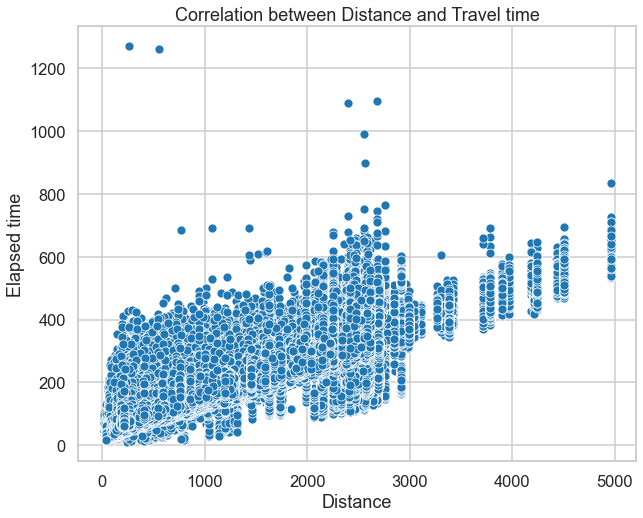

In [44]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df.Distance,y=df.ActualElapsedTime)
plt.ylabel('Elapsed time')
plt.xlabel('Distance')
plt.title('Correlation between Distance and Travel time')
plt.show()

In [45]:
df.drop(df.query('ActualElapsedTime>800').index , inplace=True)

> ### On constate qu'il existe une corrélation entre les deux variables. En effet, plus la distance est grande, plus le trajet dure. Cependant, des valeurs aberrantes sont observées. Nous avons décidé de les supprimer pour une meilleure analyse

## ArrDelay and DepDelay

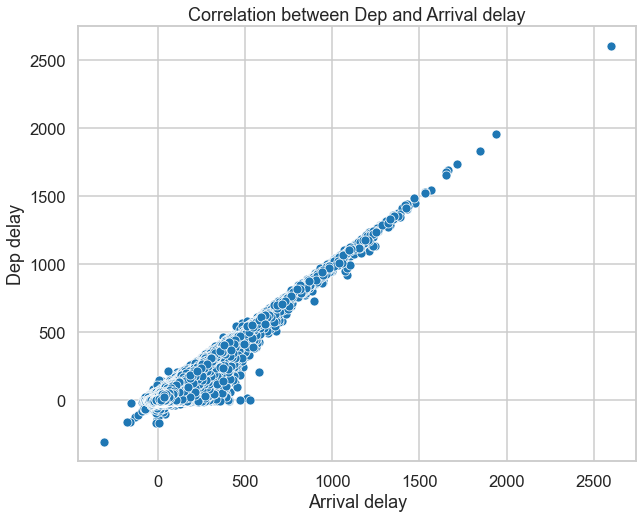

In [46]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df.ArrDelay,y=df.DepDelay)
plt.xlabel('Arrival delay')
plt.ylabel('Dep delay')
plt.title('Correlation between Dep and Arrival delay')
plt.show()

> ### On constate qu'il existe une corrélation entre les deux variables. En effet, plus l'heure de départ est retardée, plus l'heure d'arrivée l'est aussi. Ce qui est tout à fait normal.

## UniqueCarrier and DepDelay


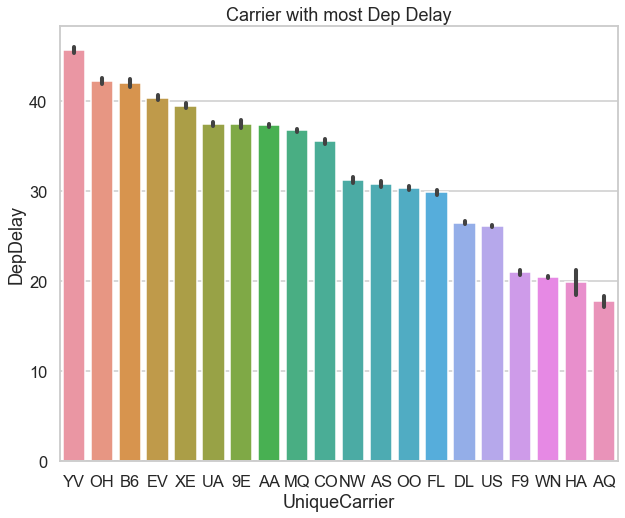

In [47]:
plt.figure(figsize=(10,8))
df_late=df[df.DepDelay > 0]
order2 = df_late.groupby(['UniqueCarrier']).DepDelay.mean().sort_values(ascending=False).index
sns.barplot(data=df_late, x='UniqueCarrier',y='DepDelay',order=order2)
plt.title('Carrier with most Dep Delay')
plt.show()

> ### En cas de désagrément entraînant un retard, les compagnies YV, CH et B6 mettent beaucoup de temps avant de décoller. AQ est le plus réactif.

## Origin and DepDelay

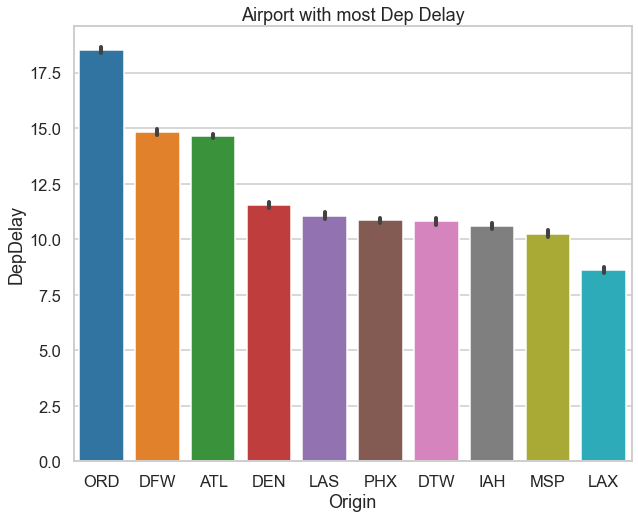

In [48]:
plt.figure(figsize=(10,8))
airport = df.Origin.value_counts().head(10).index.tolist()
df_airport = df[df.Origin.isin(airport)]
order3 = df_airport.groupby(['Origin']).DepDelay.mean().sort_values(ascending=False).index
sns.barplot(data=df_airport, x='Origin',y='DepDelay',order=order3)
plt.title('Airport with most Dep Delay')
plt.show()

> ### L'aéroport où le plus de retards sont enregistrés est l'aéroport ORD. Il est suivi successivement par DFW, ATL, DEN et LAS.

## Origin and UniqueCarrier

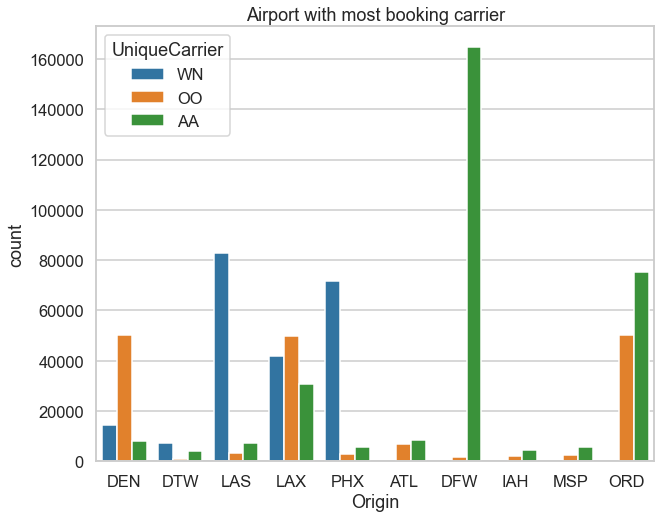

In [49]:
plt.figure(figsize=(10,8))
airport = df.Origin.value_counts().head(10).index.tolist()
aircomp= df.UniqueCarrier.value_counts().head(3).index.tolist()
df_airport = df[df.Origin.isin(airport)]
df_airport_aircomp = df_airport[df_airport.UniqueCarrier.isin(aircomp)]
sns.countplot(data=df_airport_aircomp, x='Origin',hue='UniqueCarrier')
plt.title('Airport with most booking carrier')
plt.show()

> ### On constate que les entreprises sont privilégiées dans certains aéroports. Chez DFW, AA gère une grande majorité des déplacements

In [50]:
cancelled = df.query('Cancelled == 1')

## Origin and Dest

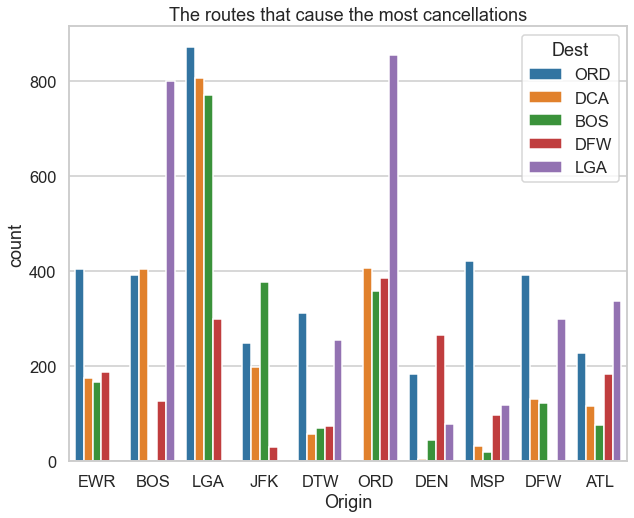

In [51]:
plt.figure(figsize=(10,8))
can_ori = cancelled.Origin.value_counts().head(10).index.tolist()
cancelled_airport = cancelled[cancelled.Origin.isin(can_ori)]
can_dest = cancelled_airport.Dest.value_counts().head(5).index.tolist()
can_routes = cancelled_airport[cancelled_airport.Dest.isin(can_dest)]
sns.countplot(data=can_routes, x='Origin',hue='Dest')
plt.title('The routes that cause the most cancellations')
plt.show()

> ### Ce graphique nous permet d'avoir un aperçu des trajets avec le plus de vols annulés

## Origin and CancellationCode

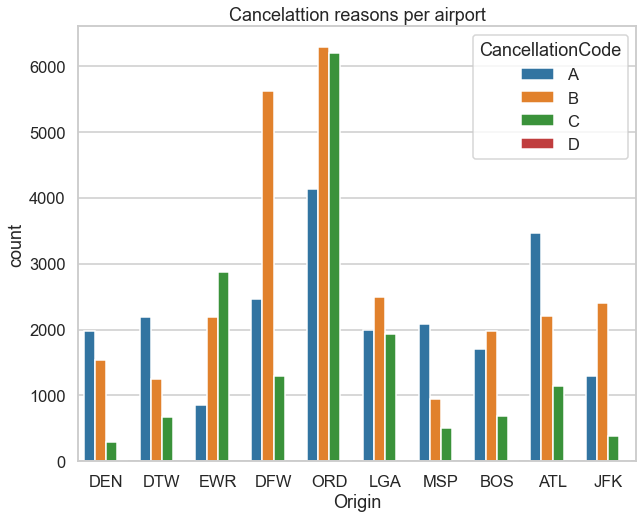

In [52]:
plt.figure(figsize=(10,8))
sns.countplot(data=cancelled_airport, x='Origin',hue='CancellationCode')
plt.title('Cancelattion reasons per airport')
plt.show()

> ### Ce graphique nous permet d'avoir un aperçu des motifs d'annulation de trajets dans chaque ville

## Diverted

In [53]:
df2= df.query('Diverted==1')

In [54]:
df2 = df2[['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'CRSDepTime', 'DepTime','Origin','Dest', 'Distance']]
df2.sample(3)

,Month,DayofMonth,DayOfWeek,UniqueCarrier,CRSDepTime,DepTime,Origin,Dest,Distance
342106,Jan,3,Wed,EV,1931,1931.0,ATL,CRP,876
6581238,Nov,12,Mon,F9,1145,1145.0,DEN,DCA,1476
7138101,Dec,30,Sun,US,700,704.0,BOS,LAS,2381


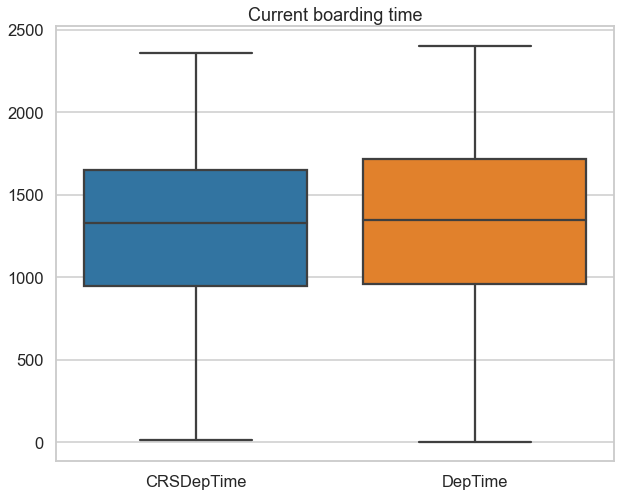

In [55]:
vars = ["CRSDepTime","DepTime"]
plt.figure(figsize=(10,8))
sns.boxplot(data = df2[vars].sample(10000))
plt.title('Current boarding time')
plt.show()

In [56]:
df2.describe(include='all')

,Month,DayofMonth,DayOfWeek,UniqueCarrier,CRSDepTime,DepTime,Origin,Dest,Distance
count,17179,17179.000000,17179,17179,17179.000000,17179.000000,17179,17179,17179.000000
unique,12,NaN,7,20,NaN,NaN,272,271,NaN
top,Jun,NaN,Thu,AA,NaN,NaN,ATL,DFW,NaN
freq,2199,NaN,2787,2097,NaN,NaN,920,1948,NaN
mean,NaN,16.239304,NaN,NaN,1319.734327,1347.600035,NaN,NaN,936.076139
std,NaN,8.742754,NaN,NaN,438.986813,466.295527,NaN,NaN,631.116412
min,NaN,1.000000,NaN,NaN,10.000000,3.000000,NaN,NaN,30.000000
25%,NaN,9.000000,NaN,NaN,950.000000,1004.000000,NaN,NaN,483.000000
50%,NaN,16.000000,NaN,NaN,1325.000000,1348.000000,NaN,NaN,802.000000
75%,NaN,24.000000,NaN,NaN,1650.000000,1715.000000,NaN,NaN,1188.500000


> ### En étudiant les cas d'avions détournés, on constate que quasiment aucune entreprise ou ville n'est épargnée. Les ravisseurs agissent probablement au hasard. Cependant, on peut dire que les vols de jour sont un critère de sélection pertinent pour qu'ils opèrent.

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="6"></a>
# **<center><span style="color:#fd7b12;">Conclusion </span></center>**

### Au cours de cette analyse, je suis tombé sur de nombreuses informations que je ne connaissais pas personnellement. c'est là la force de l'analyse des données, apportant un surplus d'informations aux décideurs. cependant je suis un peu surpris que le secteur aérien soit si diversifié d'une ville à l'autre mais aussi des nombreux cas de retards de vols. Pour un pays comme les États-Unis, cela peut être surprenant